In [1]:
pip install numpy opencv-python scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (64, 64))  # Resize to 64x64 pixels
            images.append(img.flatten())  # Flatten the image for SVM input
            label = 1 if 'cat' in filename else 0  # Label: 1 for cats, 0 for dogs
            labels.append(label)
    return np.array(images), np.array(labels)

train_images, train_labels = load_images_from_folder(r"C:\Users\VARKEY JOSHY T\Desktop\dogs and cat\train")
test_images, test_labels = load_images_from_folder(r"C:\Users\VARKEY JOSHY T\Desktop\dogs and cat\test1")

In [4]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [5]:
clf = svm.SVC(kernel='rbf', C=1.0)  # Using RBF kernel for non-linear classification
clf.fit(X_train, y_train)

SVC()

In [6]:
# Validation set evaluation
val_predictions = clf.predict(X_val)
print("Validation Set Classification Report:")
print(classification_report(y_val, val_predictions))

# Test set evaluation
test_predictions = clf.predict(test_images)
print("Test Set Classification Report:")
print(classification_report(test_labels, test_predictions))

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      2485
           1       0.66      0.64      0.65      2515

    accuracy                           0.65      5000
   macro avg       0.65      0.65      0.65      5000
weighted avg       0.65      0.65      0.65      5000

Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.53      0.69     12500
           1       0.00      0.00      0.00         0

    accuracy                           0.53     12500
   macro avg       0.50      0.27      0.35     12500
weighted avg       1.00      0.53      0.69     12500



C:\Users\VARKEY JOSHY T\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\VARKEY JOSHY T\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\VARKEY JOSHY T\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

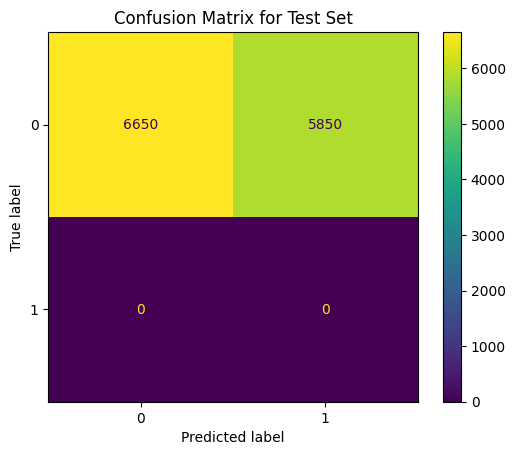

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, test_images, test_labels)
plt.title("Confusion Matrix for Test Set")
plt.show()